# Importing libraries

In [1]:
# Word Tokenizer
from nltk import word_tokenize

# To load the sentence tokenzier from a .pickle file
import nltk.data

# Stemmers and lemmatizers
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer

# Stopwords
from nltk.corpus import stopwords

# Data Handling
import pandas as pd
import string

# Jupyter specific setting
%matplotlib inline

# Tokenization

In [2]:
# Word Tokenization
def word_tokens(s):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(s)

def word_tokens_2(s):
    return word_tokenize(s)

# Stemming

In [3]:
def stemmer(word):
    porter_stemmer = PorterStemmer()
    return porter_stemmer.stem(word)

def lancaster_stemmer(word):
    l = LancasterStemmer()
    return l.stem(word)

# Stop Word Removal

In [4]:
def stop_word_removal(s):
    res = []
    to_remove = stopwords.words('english')
    return [word for word in s if word not in to_remove]

# Normalization

In [5]:
def normalizer(word):
    translate = {
        '1':'one',
        '2':'two',
        '3':'three',
        '4':'four',
        '5':'five',
        '6':'six',
        '7':'seven',
        '8':'eight',
        '9':'nine',
        '0':'zero'
    }

    abbreviations = {
        'usa' : 'united states of america', 
        'gb' : 'great britain', 
        'rs':'rupees'
    }

    punctuations = set(string.punctuation)

    # Convert all letters to lower case
    word = str.lower(word)

    # Removing punctuations from word
    word = ''.join([letter for letter in word if letter not in punctuations ])

    # Converting Numbers into words
    try:
        x = int(word)
    except ValueError:
        pass
    else:
        word = ' '.join([translate[digit] for digit in word])

    # Expanding Abbreviations
    if word in abbreviations:
        word = abbreviations[word]
    
    return word

# Putting it Together

In [6]:
# Reading Raw text
data = ''
filename = 'TIME.ALL'
with open(filename) as f:
    data = f.read()

# Tokenizing
tokens = word_tokens_2(data)
tokenized_text = ' '.join(tokens)#nltk.Text(tokens)

# Normalizing tokens
normalized = [ normalizer(token) for token in tokens]
normalized_text = ' '.join(normalized)#nltk.Text(normalized)

# Stop word removal
processed = stop_word_removal(normalized)
processed_text = ' '.join(processed)

# Stemming words
#stems = [ lancaster_stemmer(term) for term in processed]
stems = [ stemmer(term) for term in processed]
stemmed_text = ' '.join(stems)#nltk.Text(stems)

# Analytics

In [7]:
# Computing number of distinct terms
original = len(set(data.split()))
token_size = len(set(tokens))
normalized_size = len(set(normalized))
processed_size = len(set(processed))
stems_size = len(set(stems))

In [8]:
# Percentage increase/decrease
a = ((token_size - original) / original) * 100
b = ((normalized_size - token_size) / token_size) * 100
c = ((processed_size - normalized_size) / normalized_size) * 100
d = ((stems_size - processed_size) / processed_size) * 100

In [9]:
# Loading it into a dataframe
results = pd.DataFrame([
    ['Original', 'Word Tokenization', 'Normalization', 'Stop Word Removal', 'Stemming'],
    [original, token_size, normalized_size, processed_size, stems_size],
    [0, a, b, c, d],
    [0, a, a+b, a+b+c, a+b+c+d]
], index=['Preprocessing Technique', 'Number', 'Delta %', 'Cummulative %'])

results = results.T

results

,Preprocessing Technique,Number,Delta %,Cummulative %
0,Original,29829,0,0
1,Word Tokenization,23633,-20.7717,-20.7717
2,Normalization,23291,-1.44713,-22.2189
3,Stop Word Removal,23157,-0.57533,-22.7942
4,Stemming,16176,-30.1464,-52.9406


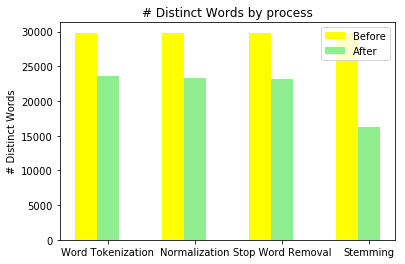

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot(before, after):
    '''
    Name of the function: plot
    Parameters:
        before: A list of #tokens before stemming, lemmatisation, normalisation, stop word removal
        after: A list of #tokens after stemming lemmatisation, normalisation, stop word removal
    Funcitonality: Plot simultaneous bar graph
    '''
    x = np.arange(len(before))  
    width = 0.25       

    fig, ax = plt.subplots()
    bar1 = ax.bar(x, before, width, color='yellow')
    bar2 = ax.bar(x + width, after, width, color='lightgreen')

    ax.set_ylabel('# Distinct Words')
    ax.set_title('# Distinct Words by process')
    ax.set_xticks(x + width)
    ax.set_xticklabels(('Word Tokenization', 'Normalization', 'Stop Word Removal', 'Stemming'))
    ax.legend((bar1[0], bar2[0]), ('Before', 'After'))

    plt.show()
    
plot([original] * 4, [token_size, normalized_size, processed_size, stems_size])  

# Additional Techniques

## Sentence Tokenization

In [11]:
def sentence_tokeinize(s):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    return tokenizer.tokenize(s)

## Lemmatization

In [12]:
def lemmatize(word):
    wordnet_lemmatizer = WordNetLemmatizer()
    return wordnet_lemmatizer.lemmatize(word)

## Testing the above functions

In [13]:
sentence = "Hello, How are you? I'm fine what about you? This is great!"
sentence = sentence.lower()
s = sentence_tokeinize(sentence)
words = word_tokens_2(s[1])
processed_sent = stop_word_removal(words)

sentence, s, words, processed_sent

("hello, how are you? i'm fine what about you? this is great!",
 ['hello, how are you?', "i'm fine what about you?", 'this is great!'],
 ['i', "'m", 'fine', 'what', 'about', 'you', '?'],
 ["'m", 'fine', '?'])

In [14]:
a = []
a.append(lemmatize("carcasses"))
a.append(lemmatize('dogs'))
a.append(lemmatize('churches'))
a.append(lemmatize('wolves'))
a.append(lemmatize('abaci'))
a.append(lemmatize('hardrock'))
a.append(lemmatize('this'))
a

['carcass', 'dog', 'church', 'wolf', 'abacus', 'hardrock', 'this']

In [15]:
a = []
a.append(stemmer('carcasses'))
a.append(stemmer('dogs'))
a.append(stemmer('churches'))
a.append(stemmer('wolves'))
a.append(stemmer('abaci'))
a.append(stemmer('hardrock'))
a

['carcass', 'dog', 'church', 'wolv', 'abaci', 'hardrock']

In [16]:
lemmatize('tokenizer')

'tokenizer'

In [17]:
stemmer('tokenizer')

'token'

In [18]:
lemmatize('women')

'woman'